In [15]:
import os
from PIL import Image
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np

import torch
from torchvision.transforms import transforms

import torchvision.transforms.functional

In [16]:
# load images
image_path = Path('./data/images')

img1 = Image.open(image_path / 'beach.png').convert('RGB')
img2 = Image.open(image_path / 'car.png').convert('RGB')
img3 = Image.open(image_path / 'rocket.png').convert('RGB')

### 1 `Centercrop(size=(height:int, width:int))`
- crops an image of size `h` x `w` from center of image
- `CenterCrop(k:int)` --> `Centercrop(size=(k,k))`


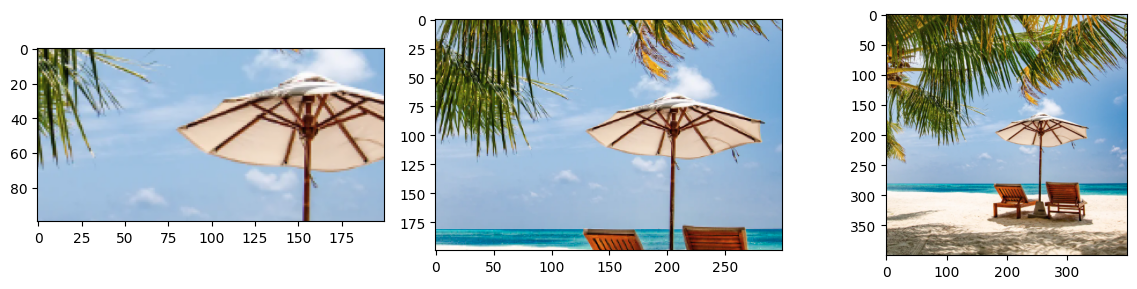

In [17]:
# 1 CenterCrop
centercrop1 = transforms.CenterCrop(size=(100, 200))
centercrop2 = transforms.CenterCrop(size=(200, 300))
centercrop3 = transforms.CenterCrop(size=(400))

# plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
axes[0].imshow(centercrop1(transforms.PILToTensor()(img1)).permute((1,2,0)))
axes[1].imshow(centercrop2(transforms.PILToTensor()(img1)).permute((1,2,0)))
axes[2].imshow(centercrop3(transforms.PILToTensor()(img1)).permute((1,2,0)))
fig.tight_layout()

## 3 `GaussianBlur(kernel_size=(k1:int, k2:int), sigma=(sigma_min, sigma_max))`
- `k1` and `k2` must be **odd** integers
- `sigma`: 
    - `float` : fixes standard deviation for blur
    - `tuple` : sample uniformely from $\sigma \sim \mathcal{U}(\sigma_{min}, \sigma_{max})$

In [18]:
# GaussianBlur
gaussblur1 = transforms.GaussianBlur(kernel_size=7, sigma=(4.1, 5.0))
gaussblur2 = transforms.GaussianBlur(kernel_size=37, sigma=(12.1, 12.1))

# plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
axes[0].imshow(img3)
axes[0].set_title('original')
axes[1].imshow(gaussblur1(img3))
axes[1].set_title('mild blurring')
axes[2].imshow(gaussblur2(img3))
axes[2].set_title('strong blurring')
fig.tight_layout()

## 4 `Grayscale`

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
axes[0].imshow(transforms.Grayscale()(img1), cmap='Greys')
axes[1].imshow(transforms.Grayscale()(img2), cmap='Greys')
axes[2].imshow(transforms.Grayscale()(img3), cmap='Greys')
fig.tight_layout()

## 5 `Normalize`

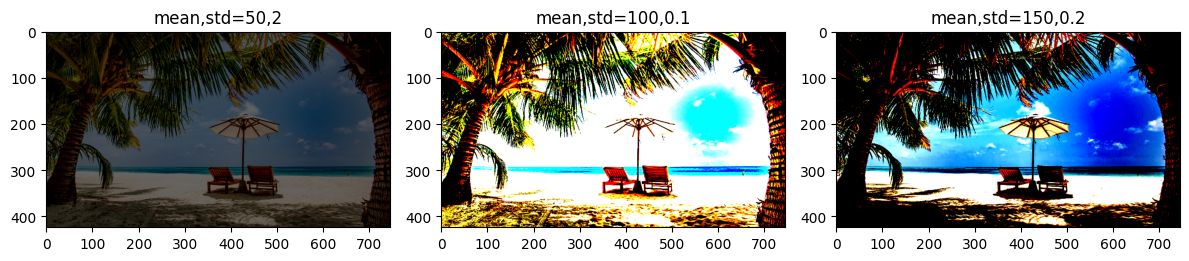

In [20]:
tens1 = transforms.PILToTensor()(img1).type(torch.float)
tens2 = transforms.PILToTensor()(img1).type(torch.float)
tens3 = transforms.PILToTensor()(img1).type(torch.float)

norm1  = transforms.Normalize(mean=50, std=2.)
norm2  = transforms.Normalize(mean=100, std=.1)
norm3  = transforms.Normalize(mean=150, std=0.2)

# plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
axes[0].imshow(norm1(tens1).round().type(torch.int).clip(0,255).permute(1,2,0))
axes[0].set_title('mean,std=50,2')
axes[1].imshow(norm2(tens2).round().type(torch.int).clip(0,255).permute(1,2,0))
axes[1].set_title('mean,std=100,0.1')
axes[2].imshow(norm3(tens3).round().type(torch.int).clip(0,255).permute(1,2,0))
axes[2].set_title('mean,std=150,0.2')
fig.tight_layout()

## 6 `PILToTensor`

In [21]:
tens1 = transforms.PILToTensor()(img1)

plt.imshow(tens1.permute(1,2,0))

## 7 `Resize(size=(H:int, W:int))`

In [22]:
# plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
axes[0].imshow(transforms.Resize(size=(100, 400))(tens1).permute(1,2,0))
axes[1].imshow(transforms.Resize(size=300)(tens1).permute(1,2,0))
axes[2].imshow(transforms.Resize(size=20)(tens1).permute(1,2,0))
fig.tight_layout()

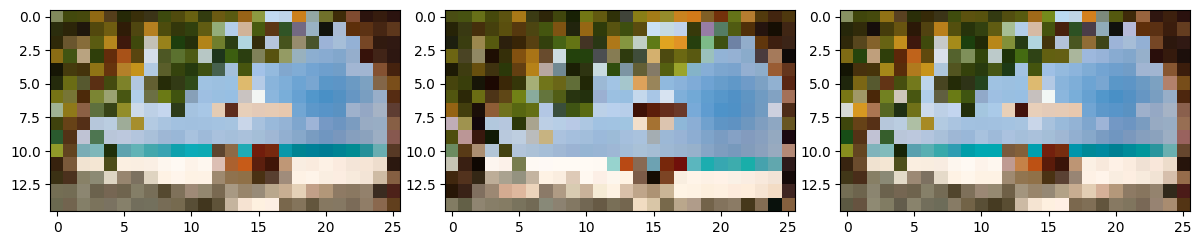

In [23]:
resize1 = transforms.Resize(15, interpolation=torchvision.transforms.functional.InterpolationMode.BILINEAR)
resize2 = transforms.Resize(15, interpolation=torchvision.transforms.functional.InterpolationMode.NEAREST)
resize3 = transforms.Resize(15, interpolation=torchvision.transforms.functional.InterpolationMode.NEAREST_EXACT)

# plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
axes[0].imshow(resize1(tens1).permute(1,2,0))
axes[1].imshow(resize2(tens1).permute(1,2,0))
axes[2].imshow(resize3(tens1).permute(1,2,0))
fig.tight_layout()

In [24]:
# 8 ?transforms.Sequence

# 9 `TenCrop(size=(), verticalflip:bool)`

In [25]:
# 
tencrop1 = transforms.TenCrop(size=(400, 400), vertical_flip=True) #(transforms.PILToTensor(img1))

# TenCrop (Forward)
imgList1 = tencrop1(img1)

# plot
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 3))
for i in range(2):
    for j in range(5):
        axes[i,j].imshow(imgList1[i*5 + j])
fig.tight_layout()

## 11 `RandomAffine`

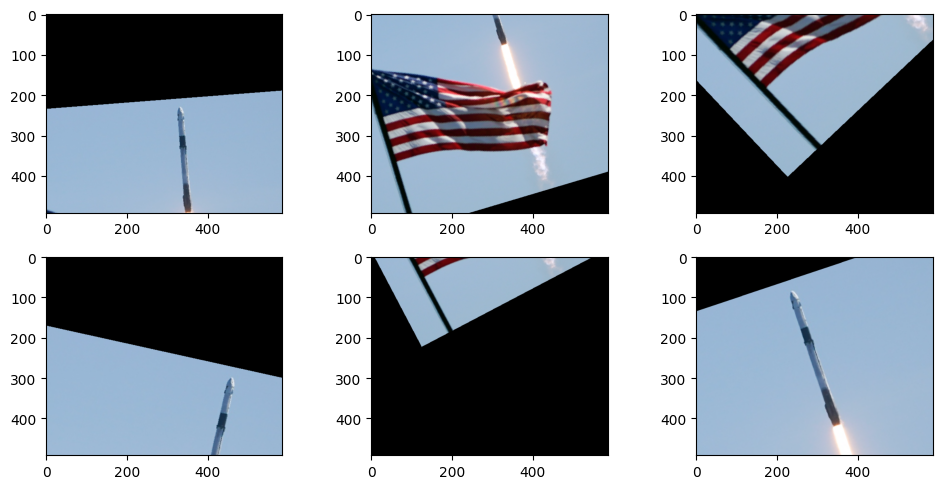

In [26]:
# define (random) affine transformation
aff = transforms.RandomAffine(degrees=(-45, 45), translate=(0.01,0.9), scale=(1, 2))

# plot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
for i in range(2):
    for j in range(3):
        axes[i,j].imshow(aff(img3))
fig.tight_layout()

## 12 `RandomCrop(size=(k1,k2), padding, fill)`

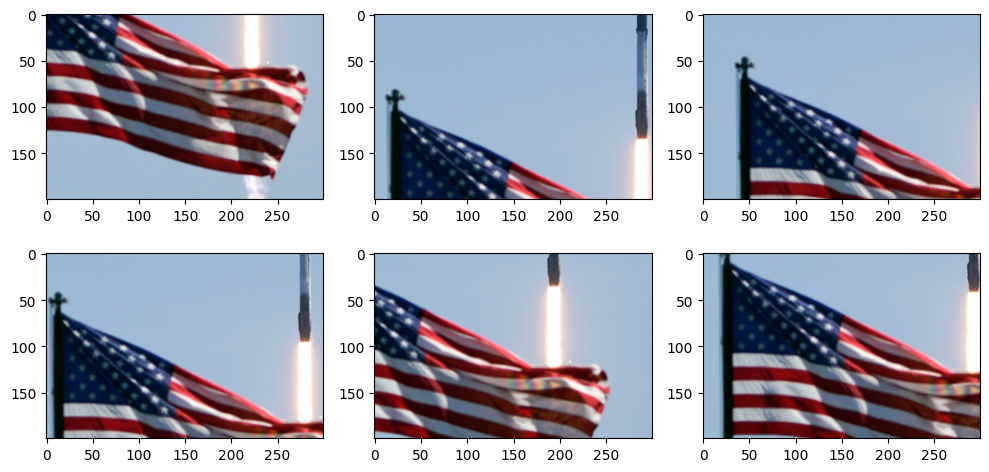

In [28]:
pad = transforms.RandomCrop(size=(200,300), padding=5, fill=5)

# plot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
for i in range(2):
    for j in range(3):
        axes[i,j].imshow(pad(img3))
fig.tight_layout()

## 13 `RandomEqualize(p:float)`

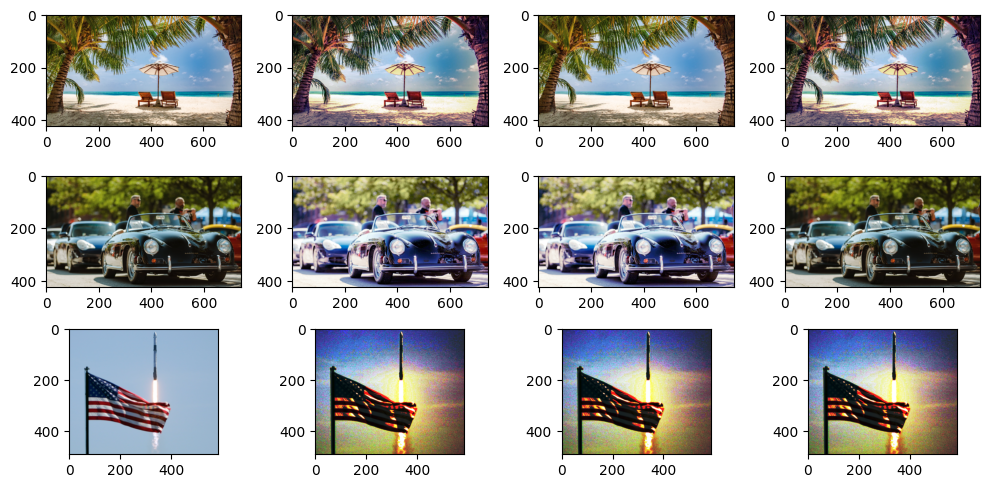

In [34]:
equal = transforms.RandomEqualize(p=0.5)

# plot
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 5))
for i in range(3):
    for j in range(4):
        if(i==0):
            axes[i,j].imshow(equal(img1))
        elif(i==1):
            axes[i,j].imshow(equal(img2))
        else:
            axes[i,j].imshow(equal(img3))
fig.tight_layout()

## 14 `RandomHorizontalFlip`

In [39]:
hFlip = transforms.RandomHorizontalFlip(p=0.5)

# plot
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 5))
for i in range(3):
    for j in range(4):
        if(i==0):
            axes[i,j].imshow(hFlip(img1))
        elif(i==1):
            axes[i,j].imshow(hFlip(img2))
        else:
            axes[i,j].imshow(hFlip(img3))
fig.tight_layout()

## 15 `RandomInvert()`

In [42]:
rInv = transforms.RandomInvert(p=0.5)

# plot
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 5))
for i in range(3):
    for j in range(4):
        if(i==0):
            axes[i,j].imshow(rInv(img1))
        elif(i==1):
            axes[i,j].imshow(rInv(img2))
        else:
            axes[i,j].imshow(rInv(img3))
fig.tight_layout()

## 16 `RandomRotation(degrees=[-90,90], interpolation, fill)`

In [54]:
PINK  = (255, 192, 203) # RGB
BROWN = (165, 42, 42)

# random rotation
rRot = transforms.RandomRotation(degrees=[-90,90], 
                                 interpolation=torchvision.transforms.functional.InterpolationMode.NEAREST,
                                 fill=BROWN,
                                 expand=False)

# plot
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 5))
for i in range(3):
    for j in range(4):
        if(i==0):
            axes[i,j].imshow(rRot(img1))
        elif(i==1):
            axes[i,j].imshow(rRot(img2))
        else:
            axes[i,j].imshow(rRot(img3))
fig.tight_layout()

## 17 `RandomSolarize(threshold=float, p:float)`

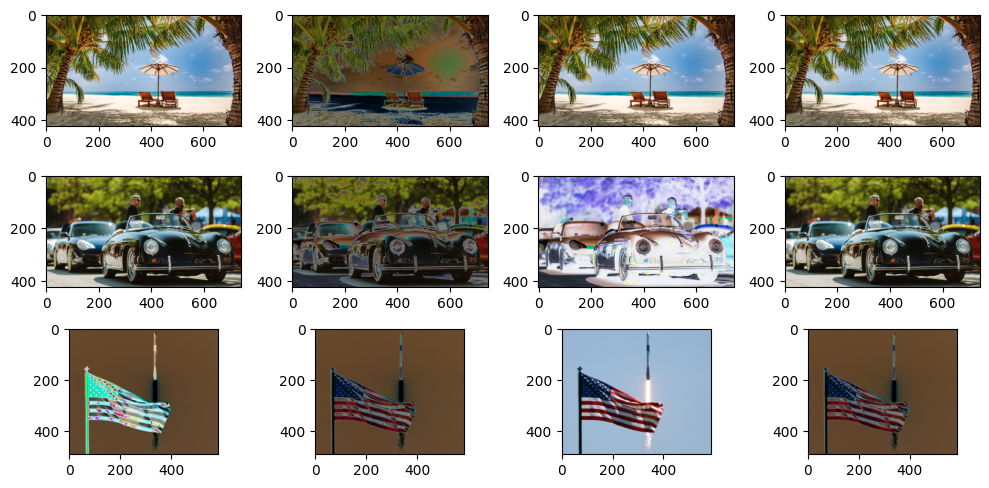

In [64]:
rSolar1 = transforms.RandomSolarize(threshold=5, p=0.5)
rSolar2 = transforms.RandomSolarize(threshold=120, p=0.5)
rSolar3 = transforms.RandomSolarize(threshold=220, p=0.5)

# plot
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 5))
for i in range(3):
    for j in range(4):
        if(i==0):
            if(j%2==0):
                axes[i,j].imshow(rSolar1(img1))
            else:
                axes[i,j].imshow(rSolar2(img1))
        elif(i==1):
            if(j%2==0):
                axes[i,j].imshow(rSolar1(img2))
            else:
                axes[i,j].imshow(rSolar2(img2))
        else:
            if(j%2==0):
                axes[i,j].imshow(rSolar1(img3))
            else:
                axes[i,j].imshow(rSolar2(img3))
fig.tight_layout()

## 18 `RandomVerticalFlip(p=0.5)`

In [65]:
hFlip = transforms.RandomVerticalFlip(p=0.5)

# plot
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 5))
for i in range(3):
    for j in range(4):
        if(i==0):
            axes[i,j].imshow(hFlip(img1))
        elif(i==1):
            axes[i,j].imshow(hFlip(img2))
        else:
            axes[i,j].imshow(hFlip(img3))
fig.tight_layout()